<a href="https://colab.research.google.com/github/remijul/tutorial/blob/master/PCA_Part_2_1_World_Governance_Indicators_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA on USA Arrests dataset 

---
The Worldwide Governance Indicators (WGI) project reports aggregate and individual governance indicators for over 200 countries and territories over the period 1996–2020, for six dimensions of governance:

* Voice and Accountability
* Political Stability and Absence of Violence/Terrorism
* Government Effectiveness
* Regulatory Quality
* Rule of Law
* Control of Corruption

These aggregate indicators combine the views of a large number of enterprise, citizen and expert survey respondents in industrial and developing countries.  They are based on over 30 individual data sources produced by a variety of survey institutes, think tanks, non-governmental organizations, international organizations, and private sector firms. [dataset info](http://info.worldbank.org/governance/wgi/#home).


## Objectives

## 1.Librairies

In [ ]:
import pandas as pd
import seaborn as sns ; sns.set()
import matplotlib.pyplot as plt
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

## 2.Data

In [ ]:
url = "https://raw.githubusercontent.com/remijul/dataset/master/WGI_project_2020.csv"
df_raw = pd.read_csv(url)
df_raw.head()

,Country Name,Country Code,Series Name,Series Code,Value
0,Afghanistan,AFG,Control of Corruption: Estimate,CC.EST,-1.56373512744904
1,Afghanistan,AFG,Government Effectiveness: Estimate,GE.EST,-1.2221063375473
2,Afghanistan,AFG,Political Stability and Absence of Violence/Te...,PV.EST,-2.74916744232178
3,Afghanistan,AFG,Regulatory Quality: Estimate,RQ.EST,-1.32791936397552
4,Afghanistan,AFG,Rule of Law: Estimate,RL.EST,-1.61642956733704


In [ ]:
df_raw = df_raw.pivot(index='Country Name', columns='Series Name', values='Value')
df_raw.head()

Series Name,Control of Corruption: Estimate,Government Effectiveness: Estimate,Political Stability and Absence of Violence/Terrorism: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate
Country Name,,,,,,
Afghanistan,-1.56373512744904,-1.2221063375473,-2.74916744232178,-1.32791936397552,-1.61642956733704,-1.08621954917908
Albania,-0.397567093372345,-0.000573236728087068,0.257720142602921,0.188962236046791,-0.347467511892319,0.159190967679024
Algeria,-0.691359281539917,-0.544694542884827,-1.13928198814392,-1.17184257507324,-0.849319279193878,-0.877241313457489
American Samoa,1.23034083843231,0.531471788883209,1.19253420829773,0.13664747774601,1.32824563980103,..
Andorra,1.23034083843231,1.86020076274872,1.39604675769806,0.871408939361572,1.5640105009079,1.19754028320313


## 3.Exploratory Data Analysis

### 3.1 Dataset description

Dimension of dataset : (lines , columns)

In [ ]:
df_raw.shape

(214, 6)

Names and data type of columns.


In [ ]:
df_raw.dtypes

Series Name
Control of Corruption: Estimate                                    object
Government Effectiveness: Estimate                                 object
Political Stability and Absence of Violence/Terrorism: Estimate    object
Regulatory Quality: Estimate                                       object
Rule of Law: Estimate                                              object
Voice and Accountability: Estimate                                 object
dtype: object

We expect numerical features and not object data types.  
Let's investigate further ...

In [ ]:
df_raw['Control of Corruption: Estimate'].value_counts()

1.23034083843231      6
..                    5
0.64254766702652      2
-0.468252688646317    2
-1.56373512744904     1
                     ..
-0.740638554096222    1
-0.942135035991669    1
-1.55633580684662     1
-0.320478618144989    1
-1.28197073936462     1
Name: Control of Corruption: Estimate, Length: 203, dtype: int64

In [ ]:
df_raw['Government Effectiveness: Estimate'].value_counts()

..                    5
1.32870924472809      3
0.265726029872894     2
1.17795729637146      2
-1.2221063375473      1
                     ..
-0.604201674461365    1
-1.00802612304688     1
-1.63544416427612     1
-0.300763994455338    1
-1.15910828113556     1
Name: Government Effectiveness: Estimate, Length: 206, dtype: int64

In [ ]:
df_raw['Political Stability and Absence of Violence/Terrorism: Estimate'].value_counts()

1.01384449005127      3
0.998822271823883     3
..                    3
0.927389860153198     3
1.39604675769806      2
                     ..
0.671826660633087     1
-0.536551833152771    1
-0.407191723585129    1
-0.504301130771637    1
-0.612713396549225    1
Name: Political Stability and Absence of Violence/Terrorism: Estimate, Length: 205, dtype: int64

In [ ]:
df_raw['Regulatory Quality: Estimate'].value_counts()

..                    5
0.871408939361572     4
0.13664747774601      2
1.23878955841064      2
-1.32791936397552     1
                     ..
-0.202417522668839    1
-0.867670774459839    1
-1.23583364486694     1
-0.416585773229599    1
-1.7201110124588      1
Name: Regulatory Quality: Estimate, Length: 205, dtype: int64

In [ ]:
df_raw['Rule of Law: Estimate'].value_counts()

..                   5
1.09248089790344     2
0.856716096401215    2
1.73632884025574     2
-1.61642956733704    1
                    ..
0.196004018187523    1
0.565270066261292    1
-1.04046821594238    1
-1.28866505622864    1
-1.32366704940796    1
Name: Rule of Law: Estimate, Length: 207, dtype: int64

In [ ]:
df_raw['Voice and Accountability: Estimate'].value_counts()

..                    10
1.26906669139862       4
1.20333790779114       2
-1.08621954917908      1
0.190056756138802      1
                      ..
-0.732261896133423     1
-0.700723111629486     1
0.304307669401169      1
-0.729568719863892     1
-1.11337447166443      1
Name: Voice and Accountability: Estimate, Length: 201, dtype: int64

**Conclusions** : some values are missing with replacement by `..`.  
They need to be converted.

Dataset information.

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, Afghanistan to Zimbabwe
Data columns (total 6 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Control of Corruption: Estimate                                  214 non-null    object
 1   Government Effectiveness: Estimate                               214 non-null    object
 2   Political Stability and Absence of Violence/Terrorism: Estimate  214 non-null    object
 3   Regulatory Quality: Estimate                                     214 non-null    object
 4   Rule of Law: Estimate                                            214 non-null    object
 5   Voice and Accountability: Estimate                               214 non-null    object
dtypes: object(6)
memory usage: 11.7+ KB


Missing data.

In [ ]:
df_raw.isna().sum()

Series Name
Control of Corruption: Estimate                                    0
Government Effectiveness: Estimate                                 0
Political Stability and Absence of Violence/Terrorism: Estimate    0
Regulatory Quality: Estimate                                       0
Rule of Law: Estimate                                              0
Voice and Accountability: Estimate                                 0
dtype: int64

No missing data however some values are encoded with `..`.

### 3.2 Data tranformation

Last exploration lead to convert some special values `..`.  
The imputation strategy consists in imputation of a constant value, choosen to be `0`, in replacement of `..`.

Let's declare the imputer and its strategy.

In [ ]:
imputer = SimpleImputer(missing_values="..", strategy='constant', fill_value='0')

Lets' fit & transform missing values.

In [ ]:
array_impute = imputer.fit_transform(df_raw)
array_impute

array([['-1.56373512744904', '-1.2221063375473', '-2.74916744232178',
        '-1.32791936397552', '-1.61642956733704', '-1.08621954917908'],
       ['-0.397567093372345', '-0.000573236728087068',
        '0.257720142602921', '0.188962236046791', '-0.347467511892319',
        '0.159190967679024'],
       ['-0.691359281539917', '-0.544694542884827', '-1.13928198814392',
        '-1.17184257507324', '-0.849319279193878', '-0.877241313457489'],
       ...,
       ['-1.668297290802', '-1.81949746608734', '-2.79377603530884',
        '-1.47993290424347', '-1.60098910331726', '-1.65175592899323'],
       ['-0.396115690469742', '-0.658354103565216', '0.18308162689209',
        '-0.48363071680069', '-0.302030891180038', '-0.300023257732391'],
       ['-1.28197073936462', '-1.15910828113556', '-0.612713396549225',
        '-1.7201110124588', '-1.32366704940796', '-1.11337447166443']],
      dtype=object)

Let's recombine a proper dataframe.

In [ ]:
df = pd.DataFrame(array_impute, columns = df_raw.columns, index = df_raw.index)
df.head()

Series Name,Control of Corruption: Estimate,Government Effectiveness: Estimate,Political Stability and Absence of Violence/Terrorism: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate
Country Name,,,,,,
Afghanistan,-1.56373512744904,-1.2221063375473,-2.74916744232178,-1.32791936397552,-1.61642956733704,-1.08621954917908
Albania,-0.397567093372345,-0.000573236728087068,0.257720142602921,0.188962236046791,-0.347467511892319,0.159190967679024
Algeria,-0.691359281539917,-0.544694542884827,-1.13928198814392,-1.17184257507324,-0.849319279193878,-0.877241313457489
American Samoa,1.23034083843231,0.531471788883209,1.19253420829773,0.13664747774601,1.32824563980103,0
Andorra,1.23034083843231,1.86020076274872,1.39604675769806,0.871408939361572,1.5640105009079,1.19754028320313


Finally we need to convert the dataframe to a numeric one.  
Let's convert and check the data types.

In [ ]:
df = df.apply(pd.to_numeric)
df.dtypes

Series Name
Control of Corruption: Estimate                                    float64
Government Effectiveness: Estimate                                 float64
Political Stability and Absence of Violence/Terrorism: Estimate    float64
Regulatory Quality: Estimate                                       float64
Rule of Law: Estimate                                              float64
Voice and Accountability: Estimate                                 float64
dtype: object

### 3.2 Data description

In [ ]:
df.describe(include='all')

Series Name,Control of Corruption: Estimate,Government Effectiveness: Estimate,Political Stability and Absence of Violence/Terrorism: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,2.063380e-09,2.335922e-09,-2.110708e-09,5.135330e-10,-2.138996e-09,3.481581e-11
std,9.881932e-01,9.881932e-01,9.929328e-01,9.881932e-01,9.881932e-01,9.762436e-01
min,-1.813440e+00,-2.259862e+00,-2.914053e+00,-2.331930e+00,-2.370821e+00,-2.132314e+00
25%,-7.345810e-01,-6.861438e-01,-5.609978e-01,-6.973764e-01,-7.297547e-01,-7.315886e-01
50%,-1.637451e-01,-8.033489e-02,6.228059e-02,-1.026840e-01,-9.125564e-02,2.904891e-02
75%,6.885358e-01,7.399804e-01,8.464004e-01,6.980338e-01,6.791370e-01,8.638737e-01
max,2.295205e+00,2.208584e+00,1.961483e+00,2.180700e+00,2.043331e+00,1.581641e+00


### 3.3 Data distribution

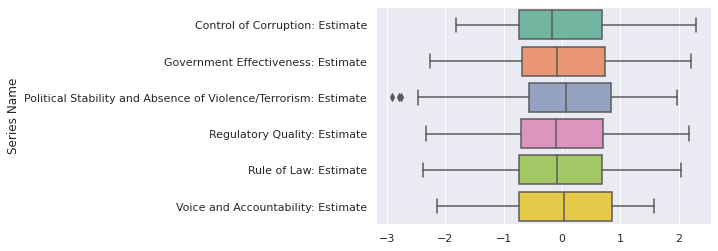

In [ ]:
sns.boxplot(data=df, orient="h", palette="Set2")

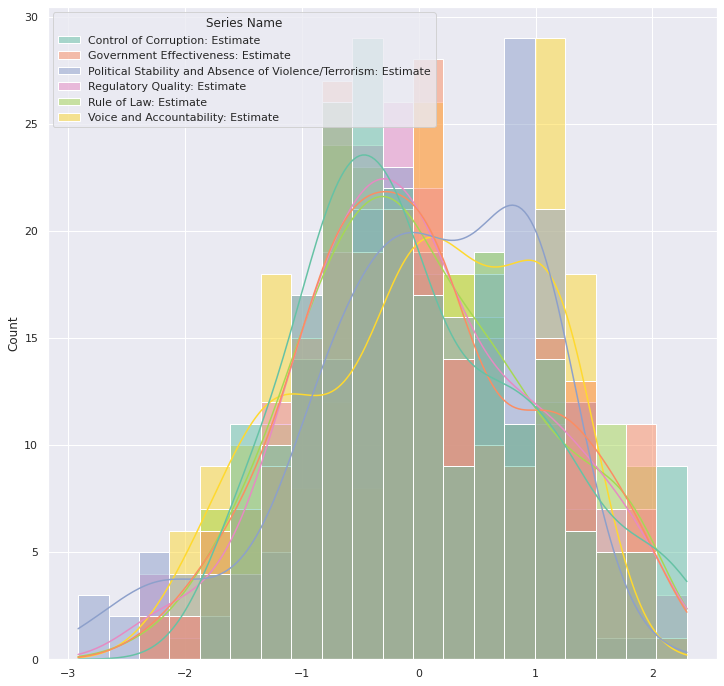

In [ ]:
plt.figure(figsize=(12,12))
sns.histplot(data=df, palette="Set2", kde=True)

### 3.4 Data correlation

In [ ]:
df.corr()

Series Name,Control of Corruption: Estimate,Government Effectiveness: Estimate,Political Stability and Absence of Violence/Terrorism: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate
Series Name,,,,,,
Control of Corruption: Estimate,1.000000,0.910214,0.749459,0.871516,0.942812,0.724850
Government Effectiveness: Estimate,0.910214,1.000000,0.698118,0.932992,0.931544,0.656335
Political Stability and Absence of Violence/Terrorism: Estimate,0.749459,0.698118,1.000000,0.650089,0.756357,0.682321
Regulatory Quality: Estimate,0.871516,0.932992,0.650089,1.000000,0.916989,0.701139
Rule of Law: Estimate,0.942812,0.931544,0.756357,0.916989,1.000000,0.740045
Voice and Accountability: Estimate,0.724850,0.656335,0.682321,0.701139,0.740045,1.000000


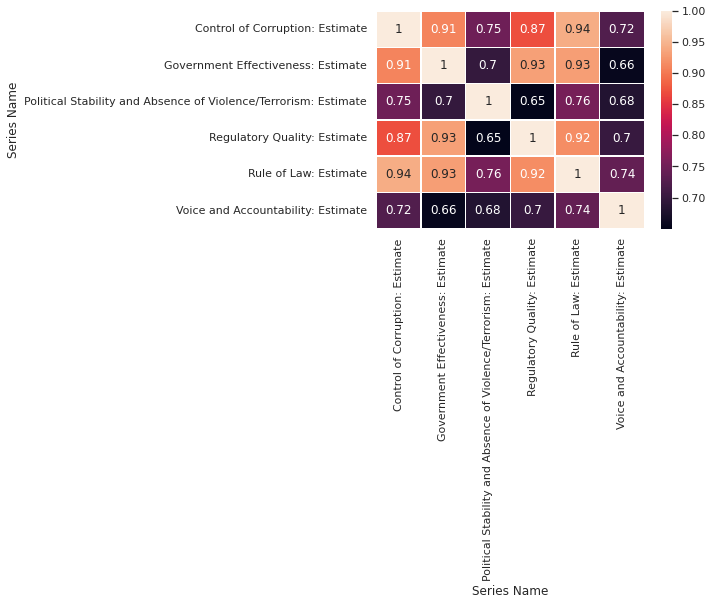

In [ ]:
sns.heatmap(df.corr(), annot=True, linewidths=0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


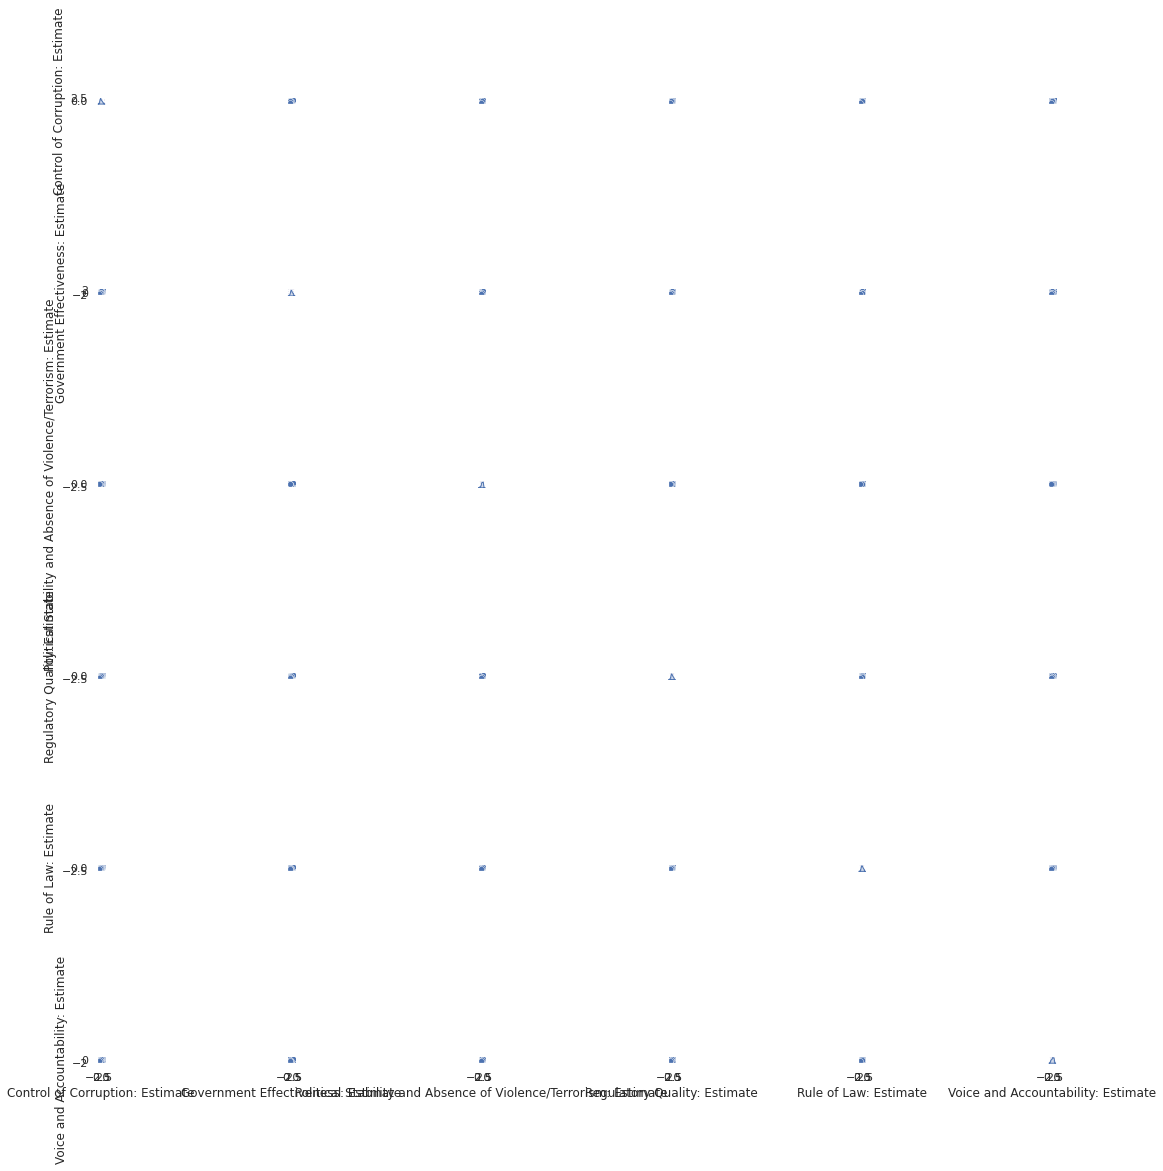

In [ ]:
sns.pairplot(data=df, palette="Set2", diag_kind='kde')

## 4.PCA - Exploratory
In the `decomposition` sub-module, we will import the `PCA()` function. The PCA' operation is similar to all the others in scikit-learn.

* We first create an object (named here `pca`) which will contain the result of the PCA. In the `PCA()` function, we can also indicate parameters such as the number of components to retain (`n_components`).
* Then, we adjust (`fit`) on data with the `fit()` function of the previously created object. In this function, we must therefore pass the data to be used (only quantitative variables).  
* If we want a standardized PCA, we have to standardize the data upstream, with for example the `scale()` function of the `preprocessing` sub-module (also imported here).  

**Of course, only quantitative variables should be used, with no missing data.**

### 4.1 Standardisation
Our dataset has already been standardised, thanks to the Worldwide Governance Indicators project.  
Let's skip this step.

Let's check the mean calculation, we expect all means to be closed to 0 after scaling.

In [ ]:
np.mean(df, axis=0)

Series Name
Control of Corruption: Estimate                                    2.063380e-09
Government Effectiveness: Estimate                                 2.335922e-09
Political Stability and Absence of Violence/Terrorism: Estimate   -2.110708e-09
Regulatory Quality: Estimate                                       5.135330e-10
Rule of Law: Estimate                                             -2.138996e-09
Voice and Accountability: Estimate                                 3.481581e-11
dtype: float64

Let's check the standard deviation calculation, we expect all standard deviations to be closed to 1 after scaling.

In [ ]:
np.std(df, axis=0)

Series Name
Control of Corruption: Estimate                                    0.985882
Government Effectiveness: Estimate                                 0.985882
Political Stability and Absence of Violence/Terrorism: Estimate    0.990610
Regulatory Quality: Estimate                                       0.985882
Rule of Law: Estimate                                              0.985882
Voice and Accountability: Estimate                                 0.973960
dtype: float64

###4.2 PCA reduction
Here we create an object of the class `PCA` with fitting and data transformation.  
The result is a array with the 4 dimensions coordinates of all data points. 

In [ ]:
pca = PCA()
data_pca = pca.fit_transform(df)
data_pca

# Or alternatively
#pca.fit(df_scaled)
#pca.transform(df_scaled)

array([[ 3.86771637, -0.89661743, -1.09561746,  0.13479241,  0.25134247,
        -0.08915137],
       [ 0.08985367,  0.28763239, -0.01620537, -0.53351702,  0.11208734,
         0.1341234 ],
       [ 2.13118799, -0.34552571, -0.05443306,  0.35867397,  0.33562628,
        -0.17646129],
       ...,
       [ 4.44439056, -0.96280397, -0.75465883,  0.26967001, -0.23822637,
        -0.04532121],
       [ 0.82460336,  0.45397323,  0.31931535,  0.00445893, -0.22559438,
        -0.00738476],
       [ 2.97209046,  0.41298038,  0.44147065,  0.13620199,  0.25142724,
        -0.17983411]])

The `pca` object now includes a number of objects and functions, such as :
* The components  (`components_`)
* The table of explained variances (`explained_variance_` - proportional to the eigenvalues) by each dimension.
* The ratio (proportion) of variance explained by dimension (`explained_variance_ratio_`).
* and others ... (see [PCA documention](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html))

### 4.3 Explained variance
The following instruction returns the variance explained by each of the PCA' dimension.

In [ ]:
pca.explained_variance_

array([4.85060134, 0.46308284, 0.31811116, 0.11549334, 0.05350107,
       0.04428065])

But it's more understandable with the percentage of variance explained by each of the PCA' dimension.

In [ ]:
pca.explained_variance_ratio_

array([0.82986192, 0.07922622, 0.05442384, 0.0197591 , 0.0091532 ,
       0.00757573])

We may conclude that :
* First dimension explains 62% of variance, 
* Second dimension explains 25% of variance, 
* Third dimension explains 9% of variance,
* Fourth dimension explains 4% of variance.

Let's resume this information in a structured data frame.

In [ ]:
df_variance = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(6)], 
        "Explained variance" : pca.explained_variance_,
        "% of explained variance" : np.round(pca.explained_variance_ratio_ * 100),
        "Cumulated % of explained variance" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
df_variance.head()

,Dimension,Explained variance,% of explained variance,Cumulated % of explained variance
0,Dim1,4.850601,83.0,83.0
1,Dim2,0.463083,8.0,91.0
2,Dim3,0.318111,5.0,96.0
3,Dim4,0.115493,2.0,98.0
4,Dim5,0.053501,1.0,99.0


### 4.4 Number of dimensions

And finally the choice of the number of dimensions may be done thanks to this plot, named **scree plot** (*graph des éboulis* in French). 

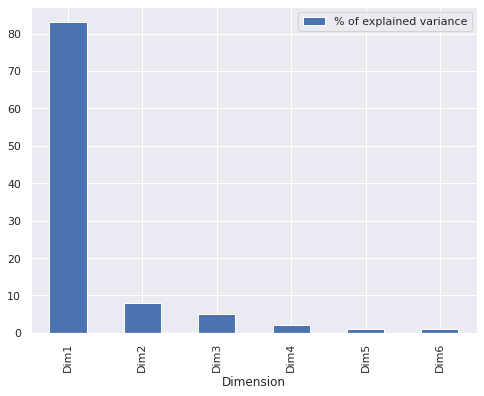

In [ ]:
df_variance.plot.bar(x = "Dimension", y = "% of explained variance", figsize=(8, 6))

We may conclude that 2 dimensions is enough to explained most of the global variance :
* The first dimension explains 83%.
* The dimensions 1 & 2 explain 91%.
* The gain obtained with the third and the others dimensions are marginal.

### 4.5 Row analysis


Let's resume this information in a structured data frame for the first 2 dimensions.

In [ ]:
df_pca = pd.DataFrame(
    {
      "Dim1" : data_pca[:,0], 
      "Dim2" : data_pca[:,1],
      "State" : df.index
    }
)
df_pca.head()

,Dim1,Dim2,State
0,3.867716,-0.896617,Afghanistan
1,0.089854,0.287632,Albania
2,2.131188,-0.345526,Algeria
3,-1.834192,0.102640,American Samoa
4,-3.318249,0.124024,Andorra


Let's visualize the data points of the first factoriel map (i.e. dimensions 1 & 2).

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


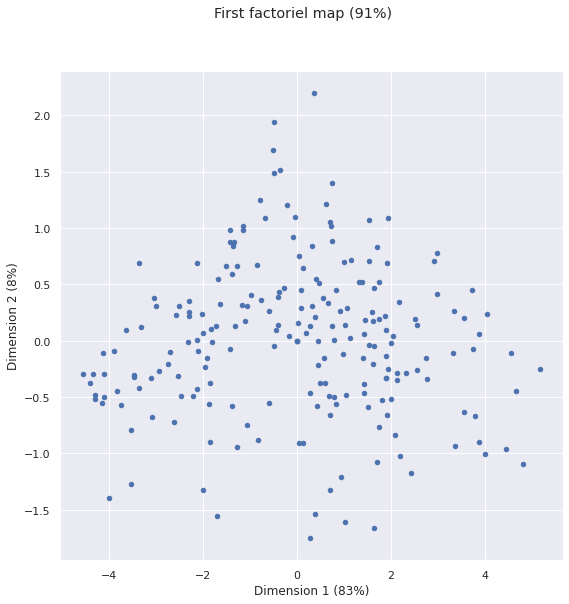

In [ ]:
df_pca.plot.scatter("Dim1", "Dim2", figsize=(9, 9))
plt.xlabel("Dimension 1 (83%)")
plt.ylabel("Dimension 2 (8%)")
plt.suptitle("First factoriel map (91%)")
plt.show()

Let's visualize only the states for which the contribution is the most important.  
Contribution means they have a siginificant effect to the dimension creation.



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


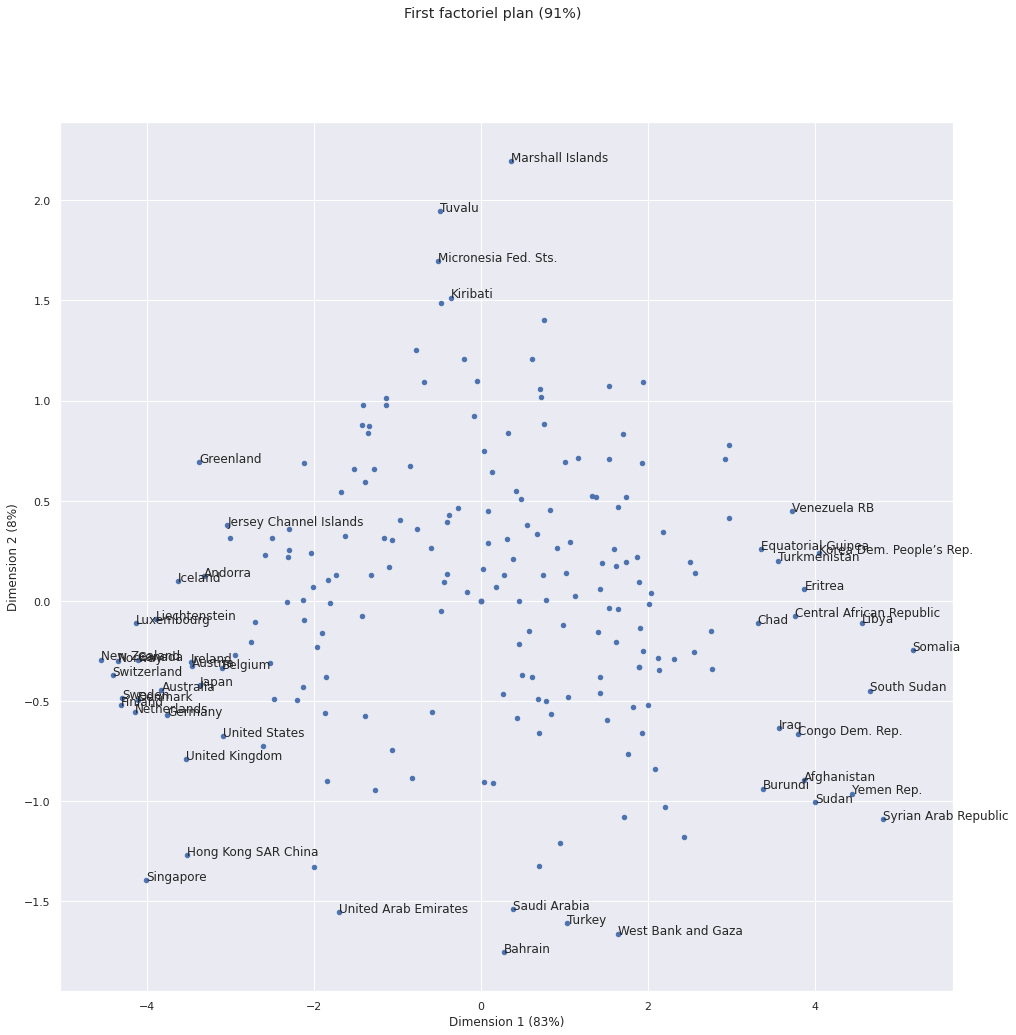

In [ ]:
# subplots for plot annotation
fig, ax = plt.subplots()
df_pca.plot.scatter("Dim1", "Dim2", ax = ax, figsize=(16, 16)) # option ax for points text on the same plot

# loop on each state
for k in df_pca.iterrows():
    # annotation only if significant contribution on the 2 dimensions (tresholds empirically choosen)
    if (abs(k[1]['Dim1']) > 3) | (abs(k[1]['Dim2']) > 1.5):
        ax.annotate(k[1]["State"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 12)
plt.xlabel("Dimension 1 (83%)")
plt.ylabel("Dimension 2 (8%)")
plt.suptitle("First factoriel plan (91%)")
plt.show()

### 4.6 Feature analysis
PCA made in an exploratory context (and not of compression) necessary needs to describe the axes from the variables, in order to understand what they represent.  
For this, we should realize the circle of correlations.

In [ ]:
n = df.shape[0] # nb data points
p = df.shape[1] # nb features

eigval = (n-1) / n * pca.explained_variance_ # eigen values
sqrt_eigval = np.sqrt(eigval) # square root of eigen values
corvar = np.zeros((p,p)) # empty matrix

# loop for matrix filling
for k in range(p): 
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]

# dataframe
coordvar = pd.DataFrame({'id': df.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar

,id,COR_1,COR_2
0,Control of Corruption: Estimate,-0.942973,-0.089809
1,Government Effectiveness: Estimate,-0.932698,-0.249121
2,Political Stability and Absence of Violence/Te...,-0.817088,0.410504
3,Regulatory Quality: Estimate,-0.921536,-0.243063
4,Rule of Law: Estimate,-0.959143,-0.108223
5,Voice and Accountability: Estimate,-0.794981,0.389212


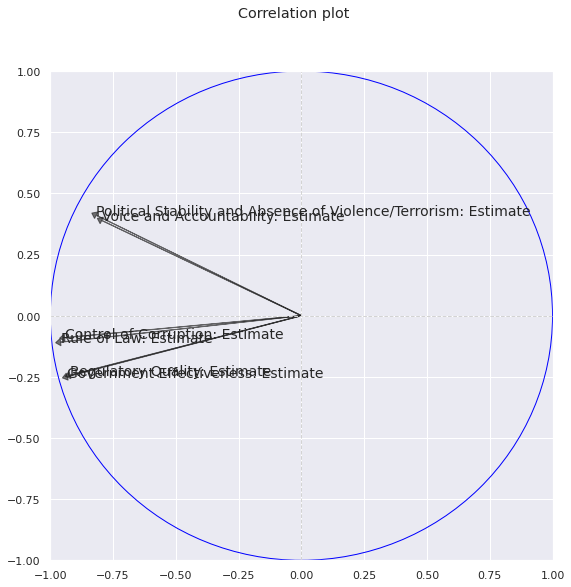

In [ ]:
# First plot with fixed coordinates (-1 and +1)
fig, axes = plt.subplots(figsize = (9,9))
fig.suptitle("Correlation plot")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# Axis
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)

# Names of features
for j in range(p):
    axes.text(x=coordvar["COR_1"][j], y=coordvar["COR_2"][j], s=coordvar["id"][j], fontsize=14)
    plt.arrow(0, 0, coordvar["COR_1"][j], coordvar["COR_2"][j], color = 'black', fc="k", ec="k", head_width=0.03, head_length=0.02, alpha = 0.6)

# Circle (0, 1)
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))
plt.show()

### 4.7 PCA interpretation
From the last sections we may interprete the PCA' results as following :
* First dimension represents all indicators. Countries on the left of the first dimension have higher values.
* Second dimension fairly represents the political stability and the accountability.

##5.PCA - Machine learning

Pipeline :
- imputation
- 2 dim
- clustering
- gridsearch : nb components, K clusters

## 6.Conclusions
* We have seen the use of principal component analysis for dimensionality reduction, for visualization and for feature selection.  
* PCA may be a good start in order to visualize the relationship between points, to understand the main variance in the data and to understand the intrinsic dimensionality.  
* Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

## 7.Ressources
* Python Data Science Handbook [In Depth: Principal Component Analysis](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb)
* FX Jollois - [Analyse de données sous Python](https://fxjollois.github.io/cours-2019-2020/lp-iot--python-ds/seance2-ACP-classif.html)